## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt

## Loading The DAtaSet

In [6]:
from kagglehub import dataset_download
path = dataset_download("dhoogla/unswnb15")
print("Path to dataset files:", path)

train_df = pd.read_parquet(f"{path}/UNSW_NB15_training-set.parquet")
test_df = pd.read_parquet(f"{path}/UNSW_NB15_testing-set.parquet")

Path to dataset files: /root/.cache/kagglehub/datasets/dhoogla/unswnb15/versions/5


## Combine training and testing datasets for preprocessing

In [7]:
data_df = pd.concat([train_df, test_df], ignore_index=True)

# Data preprocessing
# Selecting numeric columns and remove unnecessary columns

In [8]:
target_col = 'label'
numeric_cols = data_df.select_dtypes(include=['int8', 'int16', 'float32', 'bool']).columns
data_cols = [col for col in numeric_cols if col != target_col]

# Spliting back into training and testing sets

In [9]:
X = data_df[data_cols]
y = data_df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling class imbalance

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# Scaling features

In [11]:
scaler = MinMaxScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Defining classifiers

In [12]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Training and evaluating classifiers

In [13]:
best_model = None
best_accuracy = 0
results = {}

In [14]:
for name, model in classifiers.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# Printing results

In [15]:
print("Classifier Performance:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

print("\nBest Classifier:", best_model)

Classifier Performance:
Logistic Regression: 0.7913
Random Forest: 0.9350
Gradient Boosting: 0.9146

Best Classifier: RandomForestClassifier(random_state=42)


# Visualizing results

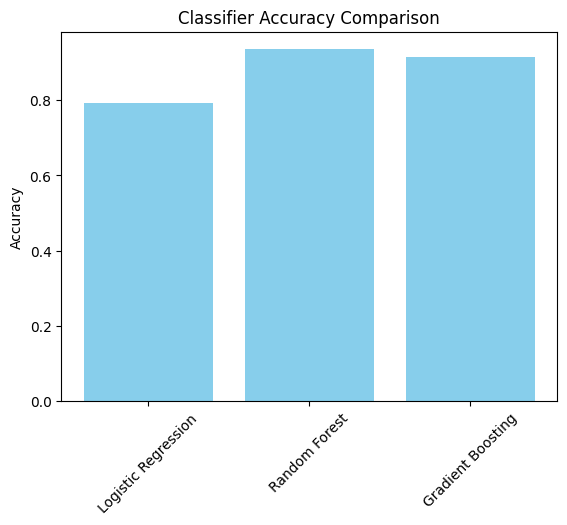

In [16]:
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()